<a href="https://colab.research.google.com/github/Faareh-Ahmed/Anomaly-Detection/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as ssn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Storing the dataset

In [11]:

folder_path = '/content/sample_data/CICIoTdataset'

# Get a list of all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each CSV file and concatenate the data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    temp_df = pd.read_csv(file_path)
    data = pd.concat([data, temp_df], ignore_index=True)



In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195803 entries, 0 to 195802
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    195803 non-null  float64
 1   Header_Length    195802 non-null  float64
 2   Protocol Type    195801 non-null  float64
 3   Duration         195801 non-null  float64
 4   Rate             195801 non-null  float64
 5   Srate            195800 non-null  float64
 6   Drate            195800 non-null  float64
 7   fin_flag_number  195800 non-null  float64
 8   syn_flag_number  195800 non-null  float64
 9   rst_flag_number  195800 non-null  float64
 10  psh_flag_number  195800 non-null  float64
 11  ack_flag_number  195800 non-null  float64
 12  ece_flag_number  195800 non-null  float64
 13  cwr_flag_number  195800 non-null  float64
 14  ack_count        195799 non-null  float64
 15  syn_count        195799 non-null  float64
 16  fin_count        195799 non-null  floa

In [13]:
print(data['label'].nunique())

34


In [14]:
print(data['label'].unique())

['DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-ICMP_Flood' 'DDoS-TCP_Flood'
 'DDoS-SynonymousIP_Flood' 'BenignTraffic' 'DDoS-RSTFINFlood'
 'DoS-SYN_Flood' 'DDoS-UDP_Flood' 'Mirai-greip_flood'
 'DDoS-UDP_Fragmentation' 'DoS-UDP_Flood' 'Mirai-udpplain'
 'MITM-ArpSpoofing' 'DoS-TCP_Flood' 'DNS_Spoofing' 'Mirai-greeth_flood'
 'DDoS-ACK_Fragmentation' 'DDoS-ICMP_Fragmentation' 'Recon-OSScan'
 'Recon-HostDiscovery' 'DoS-HTTP_Flood' 'VulnerabilityScan'
 'Recon-PortScan' 'DictionaryBruteForce' 'DDoS-SlowLoris'
 'DDoS-HTTP_Flood' 'CommandInjection' 'SqlInjection' 'BrowserHijacking'
 nan 'XSS' 'Backdoor_Malware' 'Recon-PingSweep' 'Uploading_Attack']


In [15]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 13


In [18]:
# Remove rows with NaN in the 'label' column
data = data.dropna(subset=['label'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195790 entries, 0 to 195801
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    195790 non-null  float64
 1   Header_Length    195790 non-null  float64
 2   Protocol Type    195790 non-null  float64
 3   Duration         195790 non-null  float64
 4   Rate             195790 non-null  float64
 5   Srate            195790 non-null  float64
 6   Drate            195790 non-null  float64
 7   fin_flag_number  195790 non-null  float64
 8   syn_flag_number  195790 non-null  float64
 9   rst_flag_number  195790 non-null  float64
 10  psh_flag_number  195790 non-null  float64
 11  ack_flag_number  195790 non-null  float64
 12  ece_flag_number  195790 non-null  float64
 13  cwr_flag_number  195790 non-null  float64
 14  ack_count        195790 non-null  float64
 15  syn_count        195790 non-null  float64
 16  fin_count        195790 non-null  floa

In [20]:
print(data['label'].nunique())

34


In [21]:
print(data['label'].unique())

['DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-ICMP_Flood' 'DDoS-TCP_Flood'
 'DDoS-SynonymousIP_Flood' 'BenignTraffic' 'DDoS-RSTFINFlood'
 'DoS-SYN_Flood' 'DDoS-UDP_Flood' 'Mirai-greip_flood'
 'DDoS-UDP_Fragmentation' 'DoS-UDP_Flood' 'Mirai-udpplain'
 'MITM-ArpSpoofing' 'DoS-TCP_Flood' 'DNS_Spoofing' 'Mirai-greeth_flood'
 'DDoS-ACK_Fragmentation' 'DDoS-ICMP_Fragmentation' 'Recon-OSScan'
 'Recon-HostDiscovery' 'DoS-HTTP_Flood' 'VulnerabilityScan'
 'Recon-PortScan' 'DictionaryBruteForce' 'DDoS-SlowLoris'
 'DDoS-HTTP_Flood' 'CommandInjection' 'SqlInjection' 'BrowserHijacking'
 'XSS' 'Backdoor_Malware' 'Recon-PingSweep' 'Uploading_Attack']


In [22]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 0


# Classifying Anomaly as 1 and Non-Anomaly as 0

The label feature has 34/35 different values originally which are classified as different types of anomaly but the BenignTraffic  meaning that NON-Anomaly. Hence we will assign the BenignTraffic values in the dataset as 0 and Anomaly values as 1.

In [23]:
# Assuming your DataFrame is named df
binary_mapping = {'BenignTraffic': 0, 'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
                  'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
                  'DoS-SYN_Flood': 1, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 1,
                  'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 1, 'Mirai-udpplain': 1,
                  'MITM-ArpSpoofing': 1, 'DoS-TCP_Flood': 1, 'DNS_Spoofing': 1,
                  'Mirai-greeth_flood': 1, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
                  'Recon-OSScan': 1, 'Recon-HostDiscovery': 1, 'DoS-HTTP_Flood': 1,
                  'VulnerabilityScan': 1, 'Recon-PortScan': 1, 'DictionaryBruteForce': 1,
                  'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 1,
                  'SqlInjection': 1, 'BrowserHijacking': 1, 'XSS': 1, 'Backdoor_Malware': 1,
                  'Recon-PingSweep': 1, 'Uploading_Attack': 1}

# Map the values in the 'label' column using the binary_mapping
data['label'] = data['label'].map(binary_mapping).fillna(1).astype(int)


In [24]:
print(data['label'].nunique())

2


In [25]:
print(data['label'].unique())

[1 0]


In [46]:
total_benign_traffic_rows = data[data['label'] == 0].shape[0]

print("Total rows with label 'BenignTaffic' :", total_benign_traffic_rows)


Total rows with label 'DDoS-TCP_Flood': 4578


# Model Training

In [33]:
from sklearn.model_selection import train_test_split
X = data.drop("label", axis=1)
Y = data["label"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(156632, 46)
(39158, 46)
(156632,)
(39158,)


In [36]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)


# Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.9791102712089483
Recall: 0.7679186891468455
Precision: 0.7644333230044122
F1 Score: 0.7661637911210517


# Confusion Matrix

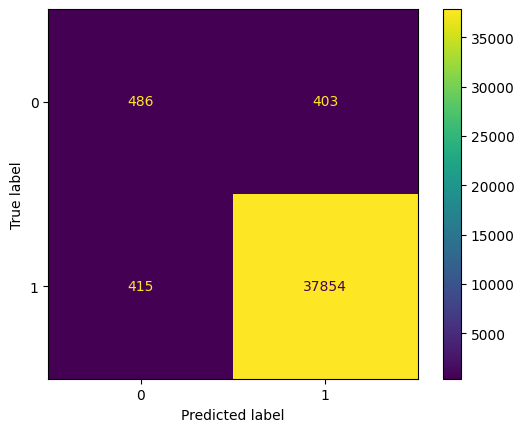

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.show()
